In [1]:
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
df = sns.load_dataset('iris')

In [6]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
import numpy as np
import pandas as pd
import sklearn

In [62]:
print(sklearn.__version__)

1.5.1


In [63]:
!pip install -U scikit-learn

In [10]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
df['species'] = df['species'].map({'setosa':0 , 'versicolor':1 , 'virginica':2}).astype(int)

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.33,random_state=42)

In [20]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [21]:
y_train.head()

96     1
105    2
66     1
0      0
122    2
Name: species, dtype: int32

In [29]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(class_weight='balanced',criterion='gini')

In [30]:
dec.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [31]:
y_test_pred = dec.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
accuracy_score(y_test,y_test_pred)

0.96

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
import warnings
warnings.filterwarnings('ignore')

In [76]:
a = list(range(1,100,3))
scores = []
for i in a:
    ada = AdaBoostClassifier(reg,n_estimators=i,learning_rate=1.0)
    ada.fit(x_train,y_train)
    y_test_pred1=ada.predict(x_test)
    curr = accuracy_score(y_test,y_test_pred1)
    scores.append(curr)

In [78]:
scores

[0.86,
 0.92,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94]

In [80]:
import matplotlib.pyplot as plt

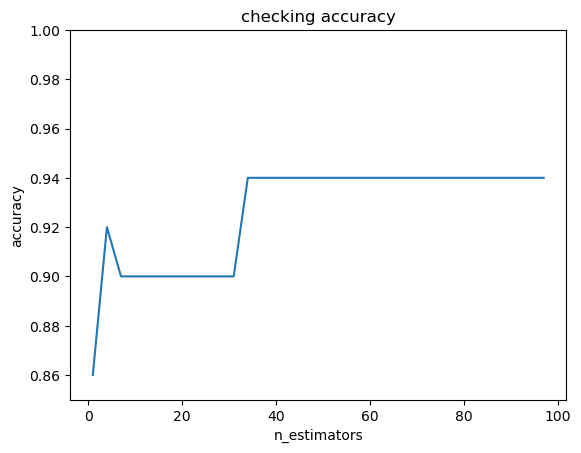

In [81]:
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('checking accuracy')
plt.plot(a,scores)
plt.ylim(0.85,1)
plt.show()

In [82]:
max(scores)

0.94